# COVID19 Effects on Regional GDP

In [34]:
# Import the required libraries and dependencies

import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from bokeh.models.renderers import GlyphRenderer
from bokeh.models import Range1d, LinearAxis, NumeralTickFormatter
import plotly.graph_objects as go

## GDP Data Analysis

In [35]:
# Import GDP data
gdp_df = pd.read_csv(
    Path('Resources/SQGDP1__ALL_AREAS_2005_2021.csv')
)
pd.set_option('display.max_columns', None)

# Review the first five rows of the DataFrame
gdp_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,2007:Q2,2007:Q3,2007:Q4,2008:Q1,2008:Q2,2008:Q3,2008:Q4,2009:Q1,2009:Q2,2009:Q3,2009:Q4,2010:Q1,2010:Q2,2010:Q3,2010:Q4,2011:Q1,2011:Q2,2011:Q3,2011:Q4,2012:Q1,2012:Q2,2012:Q3,2012:Q4,2013:Q1,2013:Q2,2013:Q3,2013:Q4,2014:Q1,2014:Q2,2014:Q3,2014:Q4,2015:Q1,2015:Q2,2015:Q3,2015:Q4,2016:Q1,2016:Q2,2016:Q3,2016:Q4,2017:Q1,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1
0,"""00000""",United States,,SQGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1.477160e+07,1.483978e+07,1.497205e+07,1.506660e+07,1.526703e+07,1.530270e+07,1.532637e+07,1.545693e+07,1.549333e+07,1.558208e+07,1.566674e+07,1.576197e+07,1.567138e+07,1.575231e+07,1.566703e+07,1.532803e+07,1.515594e+07,1.513412e+07,1.518922e+07,1.535606e+07,1.541514e+07,1.555728e+07,1.567197e+07,1.575062e+07,1.571275e+07,1.582510e+07,1.582070e+07,1.600411e+07,1.612942e+07,1.619881e+07,1.622067e+07,1.623914e+07,1.638296e+07,1.640318e+07,1.653168e+07,1.666365e+07,1.661654e+07,1.684148e+07,1.704710e+07,1.714304e+07,1.730575e+07,1.742284e+07,1.748602e+07,1.751406e+07,1.761326e+07,1.766820e+07,1.776439e+07,1.787618e+07,1.797730e+07,1.805405e+07,1.818564e+07,1.835943e+07,1.853048e+07,1.865438e+07,1.875236e+07,1.881392e+07,1.895035e+07,1.902060e+07,1.914174e+07,1.925396e+07,1.901085e+07,1.730251e+07,1.859652e+07,1.879443e+07,1.908638e+07
1,"""00000""",United States,,SQGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,9.120000e+01,9.162100e+01,9.243700e+01,9.302100e+01,9.425800e+01,9.447900e+01,9.462500e+01,9.543100e+01,9.565500e+01,9.620300e+01,9.672600e+01,9.731400e+01,9.675500e+01,9.725400e+01,9.672800e+01,9.463500e+01,9.357200e+01,9.343800e+01,9.377800e+01,9.480800e+01,9.517300e+01,9.605000e+01,9.675800e+01,9.724400e+01,9.701000e+01,9.770400e+01,9.767700e+01,9.880900e+01,9.958300e+01,1.000110e+02,1.001460e+02,1.002600e+02,1.011480e+02,1.012730e+02,1.020660e+02,1.028810e+02,1.025900e+02,1.039790e+02,1.052480e+02,1.058410e+02,1.068450e+02,1.075680e+02,1.079580e+02,1.081310e+02,1.087440e+02,1.090830e+02,1.096770e+02,1.103670e+02,1.109910e+02,1.114650e+02,1.122780e+02,1.133510e+02,1.144070e+02,1.151720e+02,1.157770e+02,1.161570e+02,1.169990e+02,1.174330e+02,1.181810e+02,1.188740e+02,1.173730e+02,1.068250e+02,1.148150e+02,1.160360e+02,1.178390e+02
2,"""00000""",United States,,SQGDP1,3.0,...,Current-dollar GDP (millions of current dollars),Millions of current dollars,1.276134e+07,1.291002e+07,1.314287e+07,1.333232e+07,1.360393e+07,1.374981e+07,1.386747e+07,1.403723e+07,1.420857e+07,1.438236e+07,1.453500e+07,1.468150e+07,1.465104e+07,1.480561e+07,1.483519e+07,1.455954e+07,1.439455e+07,1.435285e+07,1.442031e+07,1.462802e+07,1.472135e+07,1.492610e+07,1.507992e+07,1.524084e+07,1.528583e+07,1.549619e+07,1.559185e+07,1.579646e+07,1.601976e+07,1.615226e+07,1.625715e+07,1.635886e+07,1.656959e+07,1.663793e+07,1.684875e+07,1.708314e+07,1.710456e+07,1.743291e+07,1.772166e+07,1.784991e+07,1.800340e+07,1.822358e+07,1.834742e+07,1.837880e+07,1.847016e+07,1.865621e+07,1.882136e+07,1.903258e+07,1.923744e+07,1.937923e+07,1.961729e+07,1.993796e+07,2.024222e+07,2.055265e+07,2.074272e+07,2.090985e+07,2.111531e+07,2.132988e+07,2.154032e+07,2.174739e+07,2.156114e+07,1.952011e+07,2.117025e+07,2.149473e+07,2.206150e+07
3,"""01000""",Alabama,5,SQGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1.798461e+05,1.818763e+05,1.817380e+05,1.840238e+05,1.843983e+05,1.855477e+05,1.855600e+05,1.858420e+05,1.846574e+05,1.860792e+05,1.874969e+05,1.877643e+05,1.867468e+05,1.875835e+05,1.861235e+05,1.806685e+05,1.784627e+05,1.785099e+05,1.790611e+05,1.795399e+05,1.796144e+05,1.818986e+05,1.853645e+05,1.851805e+05,1.838812e+05,1.848899e+05,1.857005e+05,1.881961e+05,1.875657e+05,1.878230e+05,1.855949e+05,1

In [36]:
# Clean GDP data
# Filter LineCode 1, the real GDP data
real_gdp_df = gdp_df.loc[gdp_df['LineCode']==1.0]

# Review any ten rows of the DataFrame
real_gdp_df.sample(10)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,2007:Q2,2007:Q3,2007:Q4,2008:Q1,2008:Q2,2008:Q3,2008:Q4,2009:Q1,2009:Q2,2009:Q3,2009:Q4,2010:Q1,2010:Q2,2010:Q3,2010:Q4,2011:Q1,2011:Q2,2011:Q3,2011:Q4,2012:Q1,2012:Q2,2012:Q3,2012:Q4,2013:Q1,2013:Q2,2013:Q3,2013:Q4,2014:Q1,2014:Q2,2014:Q3,2014:Q4,2015:Q1,2015:Q2,2015:Q3,2015:Q4,2016:Q1,2016:Q2,2016:Q3,2016:Q4,2017:Q1,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1
51,"""20000""",Kansas,4,SQGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,121819.5,122424.3,123351.4,121707.3,127980.0,128958.0,128488.1,130233.5,133442.4,135179.6,135909.9,137765.8,139306.2,141035.0,139694.4,135254.5,133309.5,133021.3,133482.3,135160.3,131971.4,134203.5,136604.7,137948.6,136747.0,139410.6,139083.8,139886.7,145464.4,142677.1,137745.0,137170.0,138788.1,139757.4,140245.8,142631.8,139108.2,142938.6,146522.0,147957.2,145083.2,147715.5,148883.3,150037.1,149918.0,152084.4,153506.7,154537.1,154372.5,154203.4,154238.2,155012.2,157086.1,158515.5,158726.7,158442.5,159201.5,159771.4,160148.9,161115.6,159673.1,145906.7,157061.2,158590.3,161418.9
42,"""17000""",Illinois,3,SQGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,686380.1,686430.9,690693.7,690585.7,704552.7,705693.4,704902.4,709188.1,708845.4,711732.9,712580.8,718482.8,706047.2,709440.1,706313.4,685367.1,679494.4,680725.0,682906.9,690601.7,683930.4,691143.7,699426.1,701507.6,701087.6,705959.5,705112.4,714661.3,723563.3,724713.7,720520.5,714728.4,721398.1,716749.0,717931.2,723610.6,722470.7,734821.4,742187.9,744025.2,743695.8,747003.0,751340.1,748628.1,745046.6,745643.5,743415.5,751374.3,747671.1,750061.8,754722.1,757381.8,767710.4,767965.3,771238.4,771610.8,773419.4,769635.5,774889.3,774597.9,762096.5,697776.3,751378.3,757862.2,769748.7
102,"""37000""",North Carolina,5,SQGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,402902.9,403129.0,407391.8,411752.0,428580.3,431655.2,431467.4,435481.8,437892.1,435256.8,434523.6,439396.6,448461.8,451605.8,449026.8,437356.8,418952.6,423875.2,430150.8,436996.6,430092.2,432202.7,433615.8,439756.1,436945.0,442169.3,436553.7,438025.7,443318.5,438383.9,439903.9,436552.3,441335.5,442286.8,447697.2,449118.8,452209.2,453068.0,457368.3,458537.4,466769.5,470194.6,470784.7,470393.7,474710.5,474387.8,477449.5,483547.5,485660.2,486750.7,488842.1,494853.5,497314.5,503155.9,502254.5,505095.3,506881.6,509507.3,513146.8,516623.8,512065.9,467579.4,504659.2,510653.5,518766.9
138,"""50000""",Vermont,1,SQGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,26850.5,26749.0,26921.6,27076.8,27375.5,27207.6,27098.3,26823.8,26614.1,26748.7,26908.2,26901.8,27537.6,27547.4,27526.0,27094.0,26820.7,26723.7,27054.9,27399.0,27576.6,28053.7,28437.4,28396.7,28242.3,28648.1,28625.8,29415.6,28994.5,29302.5,28931.5,28346.0,28639.8,28435.4,28150.8,28245.6,27950.4,28287.6,28778.8,29023.7,28741.8,28850.6,28965.8,28948.1,29113.2,29102.4,29296.9,29312.4,29195.8,29183.4,29376.9,29493.3,29457.8,29636.4,29550.6,29616.7,29893.7,29679.9,29791.1,29860.0,29416.7,26079.0,28516.0,28774.0,29201.8
135,"""49000""",Utah,7,SQGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,106622.8,107848.6,110102.5,112539.1,115635.1,117524.7,119491.7,121833.1,121812.7,125072.8,125294.3,125855.5,123688.6,124880.0,124021.5,120938.5,121666.1,120859.0,120731.7,120733.3,122235.3,121900.1,123759.4,126010.5,126040.9,127452.3,127297.1,128077.5,129173.9,128620.4,128010.8,129251.9,131051.3,131550.9,133182.6,132891.7,134726.8,136058.2,136673.2,137842.6,139490.9,141121.9,142102.7,143692.4,145257.6,146226.1,148373.0,150365.3,150516.1,152452.0,155266.5,157709.4,160119.1,162582.4,163516.1,164080.0,167404.4,166872.4,169604.3

In [37]:
# Slice columns for quarterly GDP data
quarterly_gdp_df = real_gdp_df.drop(
    columns=['GeoFIPS', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Description', 'Unit']
)

# Review the first ten rows of the DataFrame
quarterly_gdp_df.head(10)

,GeoName,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,2007:Q2,2007:Q3,2007:Q4,2008:Q1,2008:Q2,2008:Q3,2008:Q4,2009:Q1,2009:Q2,2009:Q3,2009:Q4,2010:Q1,2010:Q2,2010:Q3,2010:Q4,2011:Q1,2011:Q2,2011:Q3,2011:Q4,2012:Q1,2012:Q2,2012:Q3,2012:Q4,2013:Q1,2013:Q2,2013:Q3,2013:Q4,2014:Q1,2014:Q2,2014:Q3,2014:Q4,2015:Q1,2015:Q2,2015:Q3,2015:Q4,2016:Q1,2016:Q2,2016:Q3,2016:Q4,2017:Q1,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1
0,United States,14771602.0,14839782.0,14972054.0,15066597.0,15267026.0,15302705.0,15326368.0,15456928.0,15493328.0,15582085.0,15666738.0,15761967.0,15671383.0,15752308.0,15667032.0,15328027.0,15155940.0,15134117.0,15189222.0,15356058.0,15415145.0,15557277.0,15671967.0,15750625.0,15712754.0,15825096.0,15820700.0,16004107.0,16129418.0,16198807.0,16220667.0,16239138.0,16382964.0,16403180.0,16531685.0,16663649.0,16616540.0,16841475.0,17047098.0,17143038.0,17305752.0,17422845.0,17486021.0,17514062.0,17613264.0,17668203.0,17764388.0,17876179.0,17977299.0,18054052.0,18185636.0,18359432.0,18530483.0,18654383.0,18752355.0,18813923.0,18950347.0,19020599.0,19141744.0,19253959.0,19010848.0,17302511.0,18596521.0,18794426.0,19086375.0
3,Alabama,179846.1,181876.3,181738.0,184023.8,184398.3,185547.7,185560.0,185842.0,184657.4,186079.2,187496.9,187764.3,186746.8,187583.5,186123.5,180668.5,178462.7,178509.9,179061.1,179539.9,179614.4,181898.6,185364.5,185180.5,183881.2,184889.9,185700.5,188196.1,187565.7,187823.0,185594.9,185231.9,189326.8,188505.6,189814.6,187609.7,185040.5,187596.5,188793.6,188841.6,188020.3,189664.3,190268.1,189762.6,190472.2,191585.3,191506.9,192529.2,193125.5,192926.2,193380.0,195340.2,197154.4,197704.5,197936.2,199419.7,199819.5,200006.6,201415.8,202075.5,200425.9,183585.7,197739.6,200147.4,203474.1
6,Alaska,44775.5,45197.5,44835.4,45450.3,46707.6,48252.6,48814.4,50379.2,50744.2,51636.2,51542.5,50653.1,49481.7,48445.7,50483.8,55152.8,57293.5,56661.1,55201.2,54486.5,53196.2,54431.8,54776.7,54471.3,52854.8,54074.9,54789.7,57171.2,57093.6,58639.7,58173.0,56963.9,56207.0,54228.6,54563.6,53993.2,53077.2,53290.9,53552.4,54001.9,54513.6,53918.1,53830.5,53799.1,54245.1,53348.1,52824.4,52738.3,52817.7,52731.2,53108.2,52646.4,52871.3,52919.4,52878.7,53045.5,53046.5,53031.1,53503.0,53440.2,52615.9,47460.3,50890.9,51615.1,52293.0
9,Arizona,255931.0,261074.4,266993.9,268190.2,274004.3,274871.2,278152.9,281727.4,281852.7,284289.8,287169.4,285935.1,283803.1,281617.2,277282.8,266727.2,258481.7,253989.0,251940.2,255216.8,252585.7,256310.8,259009.7,261681.2,260639.9,261620.0,262487.7,267828.8,267784.9,268817.2,267627.0,268043.4,269143.5,268989.0,270037.1,271700.2,271951.0,273310.4,275544.6,275645.5,279574.9,281709.8,281499.6,284958.0,286436.3,290018.5,293655.5,294928.1,298506.6,299757.4,304287.1,305919.9,311712.7,312751.0,314836.7,316763.9,318965.8,321335.6,325081.4,329007.5,326367.3,303451.0,324679.8,328135.0,334030.9
12,Arkansas,103269.3,103956.6,104780.7,107027.6,106559.6,108033.2,107154.2,106589.3,104172.1,104979.8,105340.0,110598.0,105463.2,107207.9,106457.1,104564.6,104491.0,100904.4,101782.6,102876.2,102007.9,104978.0,106882.3,107026.3,106796.9,106977.3,107183.2,108325.1,108927.7,108340.9,107248.9,106357.7,110322.3,109965.4,110735.8,110182.0,110510.1,111574.5,112096.9,112738.1,111911.2,112640.5,113615.6,113588.1,113271.2,113455.7,113122.0,114112.5,114678.1,114822.3,114580.1,115722.2,116118.2,116700.1,116773.8,117203.0,116707.4,117149.8,117685.9,118245.3,117049.6,107857.2,115567.7,117006.9,118983.1
15,California,1957710.6,1974674.8,2002358.9,2020201.7,2068995.2,2062341.5,2073004.4,2084755.5,2075803.3,2090233.1,2107340.5,2138682.4,2103856.9,2142702.6,2135739.3,2060085.7,2051789.4,2020838.1,2011201.8,2018703.3,2039276.4,2044921.6,2050435.0,2093328.5,2086244.5,2092379.1,2085234.1,2099489.6,2127739.5,2131359.4,2143416.6,2173842.9,2173737.7,2194607.0,2226667.6,2283429.5,2266757.6,2298574.3,2344952.6,2355040.3,2403036.5,

In [38]:
# Rename 'GeoName' column to 'Date', set 'Date' as index
quarterly_gdp_df=quarterly_gdp_df.rename(columns={"GeoName": "Date"})
quarterly_gdp_df.set_index('Date', drop=True)

# Transpose dataframe and update column names
quarterly_gdp_df=quarterly_gdp_df.transpose()
quarterly_gdp_df.columns = quarterly_gdp_df.iloc[0]
quarterly_gdp_df = quarterly_gdp_df.iloc[1:]

# Review the first five rows of the DataFrame
quarterly_gdp_df.head(5)

Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
2005:Q1,14771602.0,179846.1,44775.5,255931.0,103269.3,1957710.6,249989.5,240622.1,59019.3,100146.6,793779.7,442440.1,67637.4,54316.3,686380.1,282846.2,143282.7,121819.5,165864.1,245979.3,53293.0,300756.5,388427.0,451063.6,280008.2,94242.4,261044.0,36823.5,87448.4,135633.9,63902.1,509324.6,83930.8,1149324.5,402902.9,28990.4,539674.0,141886.3,156752.8,581217.3,51586.1,165174.0,35625.5,261815.9,1131197.9,106622.8,26850.5,408780.2,339148.1,65059.6,260063.7,33009.9,824585.9,2699884.4,2220506.4,958546.8,3328742.0,1612743.7,480892.5,2701107.2
2005:Q2,14839782.0,181876.3,45197.5,261074.4,103956.6,1974674.8,251443.1,242116.3,57742.5,100181.4,800348.7,444455.6,68157.3,55114.8,686430.9,285223.7,143949.7,122424.3,168441.7,248901.1,53432.4,303810.4,389352.8,452046.8,280826.4,94475.5,262983.6,36764.8,88373.8,139612.3,64326.8,511090.2,84259.9,1161050.6,403129.0,29151.2,543135.4,143532.2,156984.9,584721.3,52298.6,166148.3,35556.6,262784.4,1126763.8,107848.6,26749.0,414261.0,342567.3,66067.4,261391.5,33690.6,828160.1,2718724.6,2228680.6,963575.5,3354530.0,1615437.6,484961.4,2726481.1
2005:Q3,14972054.0,181738.0,44835.4,266993.9,104780.7,2002358.9,253094.9,241800.5,57759.6,99755.6,817169.1,445594.3,68758.9,56093.8,690693.7,287013.7,145060.7,123351.4,170092.5,244426.8,53587.8,309197.3,393521.0,449223.0,285838.1,95113.9,263990.8,37082.7,89567.0,139351.5,64624.5,515745.1,83411.4,1173769.1,407391.8,29142.8,547260.7,143631.1,158869.9,590529.2,52302.9,166964.5,35884.2,266278.1,1130243.1,110102.5,26921.6,419630.7,341892.8,65520.2,264582.7,32789.9,832697.2,2746909.7,2239107.3,973168.3,3385129.5,1624024.8,489297.6,2755535.9
2005:Q4,15066597.0,184023.8,45450.3,268190.2,107027.6,2020201.7,250538.8,244982.3,64766.0,99953.8,815922.6,450723.6,69658.3,55998.6,690585.7,287348.2,143327.9,121707.3,170963.1,243602.8,54112.8,310740.0,394548.5,450210.2,283277.4,98167.8,265111.2,37641.5,90940.2,140588.0,64546.7,516303.7,83573.3,1186416.4,411752.0,29381.4,546955.5,142249.8,160867.2,592628.8,52956.6,167968.3,36060.3,267733.5,1141996.9,112539.1,27076.8,419770.6,348839.5,65696.8,262234.8,33178.8,838111.1,2771036.8,2237663.6,970096.5,3403911.9,1635703.9,489926.4,2785011.3
2006:Q1,15267026.0,184398.3,46707.6,274004.3,106559.6,2068995.2,255773.1,252546.7,61219.4,100430.0,830657.1,449026.0,69765.6,57441.5,704552.7,290108.3,145094.4,127980.0,173240.2,244602.0,54178.6,310766.4,396314.6,444284.1,283516.2,96628.4,264668.7,37749.7,90240.1,143566.7,65183.8,520164.6,85561.8,1204384.4,428580.3,29835.1,542326.0,157645.4,166218.1,585572.9,52568.2,169935.8,36204.8,269882.2,1184147.8,115635.1,27375.5,425011.6,353512.2,66302.3,266022.1,35554.6,847967.5,2782790.6,2247515.0,977814.4,3445422.3,1701117.8,502161.0,2848299.2


In [39]:
# Review index
quarterly_gdp_df.index

Index(['2005:Q1', '2005:Q2', '2005:Q3', '2005:Q4', '2006:Q1', '2006:Q2',
       '2006:Q3', '2006:Q4', '2007:Q1', '2007:Q2', '2007:Q3', '2007:Q4',
       '2008:Q1', '2008:Q2', '2008:Q3', '2008:Q4', '2009:Q1', '2009:Q2',
       '2009:Q3', '2009:Q4', '2010:Q1', '2010:Q2', '2010:Q3', '2010:Q4',
       '2011:Q1', '2011:Q2', '2011:Q3', '2011:Q4', '2012:Q1', '2012:Q2',
       '2012:Q3', '2012:Q4', '2013:Q1', '2013:Q2', '2013:Q3', '2013:Q4',
       '2014:Q1', '2014:Q2', '2014:Q3', '2014:Q4', '2015:Q1', '2015:Q2',
       '2015:Q3', '2015:Q4', '2016:Q1', '2016:Q2', '2016:Q3', '2016:Q4',
       '2017:Q1', '2017:Q2', '2017:Q3', '2017:Q4', '2018:Q1', '2018:Q2',
       '2018:Q3', '2018:Q4', '2019:Q1', '2019:Q2', '2019:Q3', '2019:Q4',
       '2020:Q1', '2020:Q2', '2020:Q3', '2020:Q4', '2021:Q1'],
      dtype='object')

In [40]:
# Function that converts date of the form "<year>:<quarter>" to Pandas datetime format
def convert_date(date_string):
    split_date = date_string.split(':')
    new_date = split_date[0]
    if split_date[1] == "Q1":
        new_date += "-03-31"
    elif split_date[1] == "Q2":
        new_date += "-06-30"
    elif split_date[1] == "Q3":
        new_date += "-09-30"
    else:
        new_date += "-12-31"
    return pd.to_datetime(new_date)

# Convert index format to datetime format to align with COVID data
quarterly_gdp_df.index = quarterly_gdp_df.index.map(convert_date)

# Review DataFrame
quarterly_gdp_df

Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
2005-03-31,14771602.0,179846.1,44775.5,255931.0,103269.3,1957710.6,249989.5,240622.1,59019.3,100146.6,793779.7,442440.1,67637.4,54316.3,686380.1,282846.2,143282.7,121819.5,165864.1,245979.3,53293.0,300756.5,388427.0,451063.6,280008.2,94242.4,261044.0,36823.5,87448.4,135633.9,63902.1,509324.6,83930.8,1149324.5,402902.9,28990.4,539674.0,141886.3,156752.8,581217.3,51586.1,165174.0,35625.5,261815.9,1131197.9,106622.8,26850.5,408780.2,339148.1,65059.6,260063.7,33009.9,824585.9,2699884.4,2220506.4,958546.8,3328742.0,1612743.7,480892.5,2701107.2
2005-06-30,14839782.0,181876.3,45197.5,261074.4,103956.6,1974674.8,251443.1,242116.3,57742.5,100181.4,800348.7,444455.6,68157.3,55114.8,686430.9,285223.7,143949.7,122424.3,168441.7,248901.1,53432.4,303810.4,389352.8,452046.8,280826.4,94475.5,262983.6,36764.8,88373.8,139612.3,64326.8,511090.2,84259.9,1161050.6,403129.0,29151.2,543135.4,143532.2,156984.9,584721.3,52298.6,166148.3,35556.6,262784.4,1126763.8,107848.6,26749.0,414261.0,342567.3,66067.4,261391.5,33690.6,828160.1,2718724.6,2228680.6,963575.5,3354530.0,1615437.6,484961.4,2726481.1
2005-09-30,14972054.0,181738.0,44835.4,266993.9,104780.7,2002358.9,253094.9,241800.5,57759.6,99755.6,817169.1,445594.3,68758.9,56093.8,690693.7,287013.7,145060.7,123351.4,170092.5,244426.8,53587.8,309197.3,393521.0,449223.0,285838.1,95113.9,263990.8,37082.7,89567.0,139351.5,64624.5,515745.1,83411.4,1173769.1,407391.8,29142.8,547260.7,143631.1,158869.9,590529.2,52302.9,166964.5,35884.2,266278.1,1130243.1,110102.5,26921.6,419630.7,341892.8,65520.2,264582.7,32789.9,832697.2,2746909.7,2239107.3,973168.3,3385129.5,1624024.8,489297.6,2755535.9
2005-12-31,15066597.0,184023.8,45450.3,268190.2,107027.6,2020201.7,250538.8,244982.3,64766.0,99953.8,815922.6,450723.6,69658.3,55998.6,690585.7,287348.2,143327.9,121707.3,170963.1,243602.8,54112.8,310740.0,394548.5,450210.2,283277.4,98167.8,265111.2,37641.5,90940.2,140588.0,64546.7,516303.7,83573.3,1186416.4,411752.0,29381.4,546955.5,142249.8,160867.2,592628.8,52956.6,167968.3,36060.3,267733.5,1141996.9,112539.1,27076.8,419770.6,348839.5,65696.8,262234.8,33178.8,838111.1,2771036.8,2237663.6,970096.5,3403911.9,1635703.9,489926.4,2785011.3
2006-03-31,15267026.0,184398.3,46707.6,274004.3,106559.6,2068995.2,255773.1,252546.7,61219.4,100430.0,830657.1,449026.0,69765.6,57441.5,704552.7,290108.3,145094.4,127980.0,173240.2,244602.0,54178.6,310766.4,396314.6,444284.1,283516.2,96628.4,264668.7,37749.7,90240.1,143566.7,65183.8,520164.6,85561.8,1204384.4,428580.3,29835.1,542326.0,157645.4,166218.1,585572.9,52568.2,169935.8,36204.8,269882.2,1184147.8,115635.1,27375.5,425011.6,353512.2,66302.3,266022.1,35554.6,847967.5,2782790.6,2247515.0,977814.4,3445422.3,1701117.8,502161.0,2848299.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,19010848.0,200425.9,52615.9,326367.3,117049.6,2817221.7,360166.6,248334.4,62574.3,124570.8,962898.2,545463.2,81068.5,75911.4,762096.5,335994.7,172778.4,159673.1,189907.0,234288.9,58487.6,373780.0,516459.9,464779.9,337866.2,102683.4,285612.0,48025.2,118385.2,153612.4,76630.5,555552.2,99030.8,1472028.6,512065.9,53687.7,610345.8,193501.4,226119.9,720203.8,52967.7,212453.7,47812.8,326489.8,1749000.9,169580.4,29416.7,488269.3,55

In [41]:
# Review index to confirm it has changed to datetime
quarterly_gdp_df.index

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
      

In [42]:
# Drop non-state regions and all up US numbers.
quarterly_gdp_df = quarterly_gdp_df.drop(
        columns=["United States", "Southeast", "New England", "Far West", "Mideast", 
                 "Southwest", "Great Lakes", "Plains", "Rocky Mountain"]
)

# Review DataFrame
quarterly_gdp_df

Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2005-03-31,179846.1,44775.5,255931.0,103269.3,1957710.6,249989.5,240622.1,59019.3,100146.6,793779.7,442440.1,67637.4,54316.3,686380.1,282846.2,143282.7,121819.5,165864.1,245979.3,53293.0,300756.5,388427.0,451063.6,280008.2,94242.4,261044.0,36823.5,87448.4,135633.9,63902.1,509324.6,83930.8,1149324.5,402902.9,28990.4,539674.0,141886.3,156752.8,581217.3,51586.1,165174.0,35625.5,261815.9,1131197.9,106622.8,26850.5,408780.2,339148.1,65059.6,260063.7,33009.9
2005-06-30,181876.3,45197.5,261074.4,103956.6,1974674.8,251443.1,242116.3,57742.5,100181.4,800348.7,444455.6,68157.3,55114.8,686430.9,285223.7,143949.7,122424.3,168441.7,248901.1,53432.4,303810.4,389352.8,452046.8,280826.4,94475.5,262983.6,36764.8,88373.8,139612.3,64326.8,511090.2,84259.9,1161050.6,403129.0,29151.2,543135.4,143532.2,156984.9,584721.3,52298.6,166148.3,35556.6,262784.4,1126763.8,107848.6,26749.0,414261.0,342567.3,66067.4,261391.5,33690.6
2005-09-30,181738.0,44835.4,266993.9,104780.7,2002358.9,253094.9,241800.5,57759.6,99755.6,817169.1,445594.3,68758.9,56093.8,690693.7,287013.7,145060.7,123351.4,170092.5,244426.8,53587.8,309197.3,393521.0,449223.0,285838.1,95113.9,263990.8,37082.7,89567.0,139351.5,64624.5,515745.1,83411.4,1173769.1,407391.8,29142.8,547260.7,143631.1,158869.9,590529.2,52302.9,166964.5,35884.2,266278.1,1130243.1,110102.5,26921.6,419630.7,341892.8,65520.2,264582.7,32789.9
2005-12-31,184023.8,45450.3,268190.2,107027.6,2020201.7,250538.8,244982.3,64766.0,99953.8,815922.6,450723.6,69658.3,55998.6,690585.7,287348.2,143327.9,121707.3,170963.1,243602.8,54112.8,310740.0,394548.5,450210.2,283277.4,98167.8,265111.2,37641.5,90940.2,140588.0,64546.7,516303.7,83573.3,1186416.4,411752.0,29381.4,546955.5,142249.8,160867.2,592628.8,52956.6,167968.3,36060.3,267733.5,1141996.9,112539.1,27076.8,419770.6,348839.5,65696.8,262234.8,33178.8
2006-03-31,184398.3,46707.6,274004.3,106559.6,2068995.2,255773.1,252546.7,61219.4,100430.0,830657.1,449026.0,69765.6,57441.5,704552.7,290108.3,145094.4,127980.0,173240.2,244602.0,54178.6,310766.4,396314.6,444284.1,283516.2,96628.4,264668.7,37749.7,90240.1,143566.7,65183.8,520164.6,85561.8,1204384.4,428580.3,29835.1,542326.0,157645.4,166218.1,585572.9,52568.2,169935.8,36204.8,269882.2,1184147.8,115635.1,27375.5,425011.6,353512.2,66302.3,266022.1,35554.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,200425.9,52615.9,326367.3,117049.6,2817221.7,360166.6,248334.4,62574.3,124570.8,962898.2,545463.2,81068.5,75911.4,762096.5,335994.7,172778.4,159673.1,189907.0,234288.9,58487.6,373780.0,516459.9,464779.9,337866.2,102683.4,285612.0,48025.2,118385.2,153612.4,76630.5,555552.2,99030.8,1472028.6,512065.9,53687.7,610345.8,193501.4,226119.9,720203.8,52967.7,212453.7,47812.8,326489.8,1749000.9,169580.4,29416.7,488269.3,552600.5,70429.2,302876.0,38287.1
2020-06-30,183585.7,47460.3,303451.0,107857.2,2562916.9,331687.0,226222.0,58822.5,117650.7,880375.1,502949.1,70674.2,68821.0,697776.3,304019.2,159023.1,145906.7,170843.7,213207.6,52632.3,344685.5,469669.0,413032.1,307558.5,92942.6,259263.5,43805.0,107878.8,133952.7,68288.4,497613.7,91126.5,1315024.0,467579.4,49524.9,552235.0,176264.4,205399.2,649251.3,48022.2,192505.6,43923.2,286849.2,1605492.3,159178.3,26079.0,451258.2,513389.8,64508.8,274434.6,34706.1
2020-09-30,197739.6,50890.9,324679.8,115567.7,2742917.6,354244.5,242765.5,62521.7,122934.4,946

In [43]:
# Use hvplot to create an interactive line plot of GDP data over time for the US
# Label the x-axis parameter to Date and y-axis to GDP
# Style and format the line plot to ensure a professionally styled visualization
quarterly_gdp_df.hvplot.line(
    xlabel="Date", 
    value_label="GDP", 
    yformatter=NumeralTickFormatter(), 
    title="United States Quarterly GDP Data Over Time",
    height=750, 
    width=1000,
    legend=False
)

:NdOverlay   [Date]
   :Curve   [index]   (GDP)

Questions: What does this data tell us? What are the key observations? 

The top three states affected the most by GDP on June 30th, 2020 are: California, Texas, and New York whereas states like Vermont, Wyoming, and South Dakota were minimally affected by GDP over time. 

The states with the bigger economies have not fully recovered after the major dip in 2021. 

## COVID Data Analysis

In [44]:
# Import the data by reading in the CSV file called 
# "United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv" using the Path module
# The CSV file is located in the Resources folder
# Set the index to the column "submission_date"
# Set the parse_dates and infer_datetime_format parameters
covid_df = pd.read_csv(
    Path('Resources/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'),
    index_col='submission_date',
    parse_dates=True,    
    infer_datetime_format=True
)

# Call the sample function to review any 10 rows of the DataFrame
covid_df.sample(10)

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,,
2020-02-05,DE,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-11-28,MO,329260,NaN,NaN,2456,299.0,4985,NaN,NaN,47,0.0,11/30/2020 12:00:00 AM,Not agree,Not agree
2020-07-08,VA,67988,65191.0,2797.0,613,5.0,1937,1832.0,105.0,32,-1.0,07/09/2020 03:14:15 PM,Agree,Agree
2020-05-20,CT,39017,37037.0,1980.0,587,36.0,3529,2730.0,799.0,57,14.0,05/21/2020 03:41:38 PM,Agree,Agree
2020-04-20,FSM,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,04/20/2020 04:22:39 PM,Agree,Agree
2020-11-30,AK,31793,NaN,NaN,485,0.0,205,NaN,NaN,1,0.0,11/30/2020 12:00:00 AM,NaN,NaN
2021-02-26,VT,13830,NaN,NaN,105,1.0,202,NaN,NaN,0,0.0,02/28/2021 12:00:00 AM,Not agree,Not agree
2020-12-03,MP,106,106.0,0.0,0,0.0,2,2.0,0.0,0,0.0,12/04/2020 03:00:59 PM,Agree,Agree
2020-03-08,OH,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [45]:
# Sort DataFrame by submission_date index in chronological order
covid_df = covid_df.sort_index()

# Review DataFrame
covid_df

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,,
2020-01-22,NY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
2020-01-22,OH,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-22,TX,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
2020-01-22,UT,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-22,GU,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,CT,350245,320346.0,29899.0,206,39.0,8279,6810.0,1469.0,0,0.0,07/14/2021 02:14:34 PM,Agree,Agree
2021-07-13,OH,1114835,931299.0,183536.0,344,129.0,20411,20411.0,0.0,31,0.0,07/14/2021 02:14:34 PM,Agree,Agree
2021-07-13,VA,683614,531519.0,152095.0,412,204.0,11467,9680.0,1787.0,8,2.0,07/14/2021 02:14:34 PM,Agree,Agree


In [46]:
# Use the isnull function in conjunction with the sum function to determine 
# the total number of missing values in the DataFrame
covid_df.isnull().sum()

state                 0
tot_cases             0
conf_cases        16893
prob_cases        16964
new_case              0
pnew_case          4336
tot_death             0
conf_death        16425
prob_death        16425
new_death             0
pnew_death         4395
created_at            0
consent_cases      5929
consent_deaths     4851
dtype: int64

In [47]:
# Using the fillna function, replace all of the missing values in the dataframe with a 0
covid_df=covid_df.fillna(0)

# Rerun the isnull function in conjunction with the sum function to confirm there are 
# no missing values
covid_df.isnull().sum()

state             0
tot_cases         0
conf_cases        0
prob_cases        0
new_case          0
pnew_case         0
tot_death         0
conf_death        0
prob_death        0
new_death         0
pnew_death        0
created_at        0
consent_cases     0
consent_deaths    0
dtype: int64

In [48]:
# Call the dtypes function on the `covid_df` DataFrame to confirm that all the data is numeric 
# for the new_case and pnew_case columns we are plotting
covid_df.dtypes

state              object
tot_cases           int64
conf_cases        float64
prob_cases        float64
new_case            int64
pnew_case         float64
tot_death           int64
conf_death        float64
prob_death        float64
new_death           int64
pnew_death        float64
created_at         object
consent_cases      object
consent_deaths     object
dtype: object

In [49]:
# Create a sliced DataFrame called "total_daily_new_cases_df" that includes only 
# the new_case, pnew_case, and state columns
total_daily_new_cases_df = covid_df.loc[:,['state', 'new_case', 'pnew_case']]

# Review DataFrame
# new_case represents the number of daily new cases, 
# and pnew_case represents the number of probable daily new cases 
total_daily_new_cases_df

,state,new_case,pnew_case
submission_date,,,
2020-01-22,NY,0,0.0
2020-01-22,OH,0,0.0
2020-01-22,TX,0,0.0
2020-01-22,UT,0,0.0
2020-01-22,GU,0,0.0
...,...,...,...
2021-07-13,CT,206,39.0
2021-07-13,OH,344,129.0
2021-07-13,VA,412,204.0


In [50]:
# Create a new column named tot_daily_cases by adding the values in new_case and pnew_case columns
total_daily_new_cases_df['tot_daily_cases'] = total_daily_new_cases_df['new_case'] + total_daily_new_cases_df['pnew_case']

# Remove negative values to keep only values greater than or equal to 0
total_daily_new_cases_df = total_daily_new_cases_df.loc[
    total_daily_new_cases_df['tot_daily_cases'] >= 0
]

# Include only fifty states and DC in order to match GDP data 
non_state_list = ['PW', 'FSM', 'AS', 'RMI', 'MP', 'VI', 'GU', 'PR', 'NYC']
total_daily_new_cases_df = total_daily_new_cases_df.loc[~total_daily_new_cases_df['state'].isin(non_state_list)]

# Review DataFrame
total_daily_new_cases_df

,state,new_case,pnew_case,tot_daily_cases
submission_date,,,,
2020-01-22,NY,0,0.0,0.0
2020-01-22,OH,0,0.0,0.0
2020-01-22,TX,0,0.0,0.0
2020-01-22,UT,0,0.0,0.0
2020-01-22,PA,0,0.0,0.0
...,...,...,...,...
2021-07-13,AZ,345,11.0,356.0
2021-07-13,CA,3256,0.0,3256.0
2021-07-13,CT,206,39.0,245.0


In [51]:
# Create a numerical aggregation by grouping the tot_daily_cases by submission_date 
# and summing up the US total daily results
total_daily_new_cases_US_df = total_daily_new_cases_df.groupby('submission_date').sum()

# Review the resulting DataFrame
total_daily_new_cases_US_df

,new_case,pnew_case,tot_daily_cases
submission_date,,,
2020-01-22,33,6.0,39.0
2020-01-23,2,0.0,2.0
2020-01-24,1,0.0,1.0
2020-01-25,3,0.0,3.0
2020-01-26,3,0.0,3.0
...,...,...,...
2021-07-09,27074,5713.0,32787.0
2021-07-10,20700,4097.0,24797.0
2021-07-11,17401,2938.0,20339.0


In [52]:
# Create an interactive visualization with hvplot to plot the tot_daily_cases 
# for total_daily_new_cases_US_df DataFrame
# Include labels for the x- and y-axes, and a title
# Adjust the width and height of the plot to enhance readability
total_daily_new_cases_US_df['tot_daily_cases'].hvplot(
    xlabel='Date',
    ylabel='Total Daily New Cases',
    title='US Total COVID Daily New Cases Jan 2020 - Jul 2021',
    width=1200,
    height=500,
    ylim=(-40000, 400000)
).opts(
    yformatter=NumeralTickFormatter()
)

:Curve   [submission_date]   (tot_daily_cases)

Question: What are some of the observations we have from this plot?
Answer: There have been four major peaks of US national daily new case from the beginning of 2020 to July 2021, which were May 2020, July 2020, January 2021, and April 2021. The highest new case increase we have had was 368,901 new cases around 01/08/2021. At the end of the timetable, the daily new cases are still trending up. 

In [53]:
# Create a numerical aggregation by grouping the data by state 
# and sort the total daily new cases in each state
total_daily_new_cases_df_by_state = total_daily_new_cases_df.groupby('state').sum().sort_values('tot_daily_cases')

# Review the resulting DataFrame
total_daily_new_cases_df_by_state

,new_case,pnew_case,tot_daily_cases
state,,,
VT,22916,623.0,23539.0
HI,36550,1165.0,37715.0
DC,49494,0.0,49494.0
AK,68951,0.0,68951.0
WY,63344,10271.0,73615.0
ME,69265,18683.0,87948.0
DE,110115,7676.0,117791.0
ND,110961,9258.0,120219.0
MT,114347,12362.0,126709.0


In [54]:
# Create an interactive visualization with hvplot to plot the tot_daily_cases 
# for total_daily_new_cases_df_by_state DataFrame
# Include labels for the x- and y-axes, and a title
# Adjust the width and height of the plot to enhance readability
total_daily_new_cases_df_by_state['tot_daily_cases'].hvplot.bar(
    xlabel='States',
    ylabel='Total Daily New Cases in Every State',
    title='Total COVID Daily New Cases for Every State from Jan 2020 to Jul 2021',
    height=500,
    width=1200
).opts(
    yformatter=NumeralTickFormatter(),
    hover_color='yellow'
)

:Bars   [state]   (tot_daily_cases)

Questions: What are the key observations?
Answer: From the sorted daily new cases values by state, we can tell that California, Texas, and Florida have most cumulative daily new cases, and Vermont, Hawaii, and Washington DC have the least cumulative new cases. Most states have had less than 1 million new cases so far. The cumulative new cases of TN, MI, NY, NJ, NC, OH, GA, IL, and PA were in the 1 million to 2 million range. The top three states have significantly higher numbers, at least doubled or tripled the number of most of other states. 

## Combined Data Analysis

In [55]:
# Find the oldest date in "total_daily_new_cases_df"
total_daily_new_cases_df['tot_daily_cases'].sort_index()

submission_date
2020-01-22       0.0
2020-01-22       0.0
2020-01-22       0.0
2020-01-22       0.0
2020-01-22       0.0
               ...  
2021-07-13     356.0
2021-07-13    3256.0
2021-07-13     245.0
2021-07-13     473.0
2021-07-13     616.0
Name: tot_daily_cases, Length: 27417, dtype: float64

In [56]:
# Our COVID DataFrame starts at 2020-01-22, so when analyzing COVID and GDP data together,
# we will slice the GDP data to start about the time the COVID data starts.
quarterly_gdp_df_recent = quarterly_gdp_df.loc['2019-12-31':]
quarterly_gdp_df_recent

Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2019-12-31,202075.5,53440.2,329007.5,118245.3,2848267.1,361367.3,252214.6,64503.0,124940.6,973507.9,551120.4,82983.4,76280.9,774597.9,340545.7,173659.8,161115.6,192360.0,241835.4,59476.6,377229.3,522215.3,474492.0,343849.0,103662.2,289378.1,48625.3,119428.0,155549.2,77049.4,560216.6,100228.6,1495608.7,516623.8,53902.4,619256.7,197208.9,228411.3,731055.1,53680.3,217072.7,48105.0,329751.7,1777395.8,171289.9,29860.0,494565.5,556250.1,71658.7,309898.3,39367.1
2020-03-31,200425.9,52615.9,326367.3,117049.6,2817221.7,360166.6,248334.4,62574.3,124570.8,962898.2,545463.2,81068.5,75911.4,762096.5,335994.7,172778.4,159673.1,189907.0,234288.9,58487.6,373780.0,516459.9,464779.9,337866.2,102683.4,285612.0,48025.2,118385.2,153612.4,76630.5,555552.2,99030.8,1472028.6,512065.9,53687.7,610345.8,193501.4,226119.9,720203.8,52967.7,212453.7,47812.8,326489.8,1749000.9,169580.4,29416.7,488269.3,552600.5,70429.2,302876.0,38287.1
2020-06-30,183585.7,47460.3,303451.0,107857.2,2562916.9,331687.0,226222.0,58822.5,117650.7,880375.1,502949.1,70674.2,68821.0,697776.3,304019.2,159023.1,145906.7,170843.7,213207.6,52632.3,344685.5,469669.0,413032.1,307558.5,92942.6,259263.5,43805.0,107878.8,133952.7,68288.4,497613.7,91126.5,1315024.0,467579.4,49524.9,552235.0,176264.4,205399.2,649251.3,48022.2,192505.6,43923.2,286849.2,1605492.3,159178.3,26079.0,451258.2,513389.8,64508.8,274434.6,34706.1
2020-09-30,197739.6,50890.9,324679.8,115567.7,2742917.6,354244.5,242765.5,62521.7,122934.4,946128.7,539836.8,75658.3,75295.8,751378.3,332611.9,171842.0,157061.2,186240.4,229019.5,56972.6,367486.6,504488.6,452637.8,332320.1,101006.5,280340.8,46847.0,115887.2,148792.5,74396.5,538512.1,96089.7,1404848.2,504659.2,52089.7,597309.0,186075.7,221433.2,700449.9,51809.4,208831.2,47092.2,315609.2,1713361.5,171387.9,28516.0,481349.8,555011.6,68944.7,298690.5,36282.2
2020-12-31,200147.4,51615.1,328135.0,117006.9,2768298.2,358173.0,246890.2,63416.4,123298.5,953295.3,546017.9,76049.9,76294.1,757862.2,336723.1,174476.1,158590.3,188225.3,230724.7,57363.4,370725.0,510331.5,454547.7,336145.0,102396.9,284197.6,47268.3,117678.1,150313.8,75100.8,544857.2,96676.3,1417744.9,510653.5,52782.2,604588.8,187694.8,222921.3,706876.9,52137.4,211080.3,48218.1,320798.4,1744442.3,174339.2,28774.0,486921.5,557527.6,69528.9,300740.3,36622.8
2021-03-31,203474.1,52293.0,334030.9,118983.1,2811126.3,365047.5,250538.8,64288.8,124189.5,969564.9,555387.2,76885.2,77395.3,769748.7,342345.1,176709.8,161418.9,191163.4,233383.3,58096.3,376287.6,518895.9,462926.6,342255.5,104130.9,288450.7,48092.8,119441.1,154246.3,76632.1,552320.2,97736.0,1440634.5,518766.9,53758.7,613968.9,189784.9,226528.8,717307.9,53051.9,214474.5,48975.3,326545.9,1762989.1,178204.7,29201.8,494054.2,565702.4,70912.6,305164.4,37081.4


In [57]:
# Function to apply a second y-axis using a secondary range and a glyph.
# Adapted from:
# https://discourse.holoviz.org/t/secondary-y-axis-for-plotting-multiple-columns/851
# https://stackoverflow.com/questions/53489164/secondary-axis-for-holoviewsbokeh-graph
# https://www.programcreek.com/python/example/127766/bokeh.models.LinearAxis
# https://docs.bokeh.org/en/latest/docs/reference/models/formatters.html
def apply_second_y_formatter(plot, element):
    # Create secondary range and axis for number of Covid cases.
    plot.state.extra_y_ranges = {"second_y": Range1d(start=0, end=400000)}
    plot.state.add_layout(
        LinearAxis(
            axis_label="New Covid Cases",
            y_range_name="second_y",
            formatter=NumeralTickFormatter()
        ), 
        "right"
    )

    # Set glyph y_range_name to the range we've just created.
    glyph = plot.state.select(dict(type=GlyphRenderer))[0]
    glyph.y_range_name = "second_y"

# Create GDP hvplot.
gdp_recent_plot = quarterly_gdp_df_recent.hvplot(legend=False)

# Get a DataFrame of just COVID total daily cases.
covid_new_cases_df = total_daily_new_cases_US_df['tot_daily_cases'].to_frame()

# Create COVID plot and send it to formatter. 
covid_plot = covid_new_cases_df.hvplot(
    xlabel="Date",
    yaxis="left",
    ylabel="GDP in $",
    title="US GDP and Total New COVID Cases Data",
    height=750,
    width=1200
).opts(hooks=[apply_second_y_formatter], yformatter=NumeralTickFormatter())

# Plot both plots together.
covid_plot * gdp_recent_plot

:Overlay
   .Curve.I     :Curve   [submission_date]   (tot_daily_cases)
   .NdOverlay.I :NdOverlay   [Date]
      :Curve   [index]   (value)

In [58]:
#total_daily_new_cases_by_state_df = covid_df.loc[:,['state','new_case', 'pnew_case']]
#total_daily_new_cases_by_state_df['tot_daily_cases'] = total_daily_new_cases_df['new_case'] + total_daily_new_cases_df['pnew_case']
#total_daily_new_cases_by_state_df = total_daily_new_cases_by_state_df.loc['2020-03-31':'2020-06-30']
#covid_df_2020 =  total_daily_new_cases_by_state_df.groupby('state').sum()#covid_df_2020 = covid_df_2020.reset_index()
#covid_df_2020

#Selecting a one year time frame from the dataframe
total_daily_new_cases_df_one_year = total_daily_new_cases_df.loc['2020-01-22':'2020-12-31']
total_daily_new_cases_df_one_year


,state,new_case,pnew_case,tot_daily_cases
submission_date,,,,
2020-01-22,NY,0,0.0,0.0
2020-01-22,OH,0,0.0,0.0
2020-01-22,TX,0,0.0,0.0
2020-01-22,UT,0,0.0,0.0
2020-01-22,PA,0,0.0,0.0
...,...,...,...,...
2020-12-31,KY,3176,584.0,3760.0
2020-12-31,RI,881,0.0,881.0
2020-12-31,MA,7260,373.0,7633.0


In [59]:
#Grouping the States and summing up the total cases within a year
total_daily_new_cases_df_one_year_by_state = total_daily_new_cases_df_one_year.groupby('state').sum()
total_daily_new_cases_df_one_year_by_state

,new_case,pnew_case,tot_daily_cases
state,,,
AK,45771,0.0,45771.0
AL,390649,80501.0,471150.0
AR,225538,38354.0,263892.0
AZ,520559,25090.0,545649.0
CA,2425957,0.0,2425957.0
CO,334097,14717.0,348814.0
CT,182040,21064.0,203104.0
DC,28983,0.0,28983.0
DE,58847,2387.0,61234.0


In [60]:
#Resetting the index as the next cell block will need the other data as a column
total_daily_new_cases_df_one_year_by_state = total_daily_new_cases_df_one_year_by_state.reset_index()
total_daily_new_cases_df_one_year_by_state

,state,new_case,pnew_case,tot_daily_cases
0,AK,45771,0.0,45771.0
1,AL,390649,80501.0,471150.0
2,AR,225538,38354.0,263892.0
3,AZ,520559,25090.0,545649.0
4,CA,2425957,0.0,2425957.0
5,CO,334097,14717.0,348814.0
6,CT,182040,21064.0,203104.0
7,DC,28983,0.0,28983.0
8,DE,58847,2387.0,61234.0
9,FL,1301641,177101.0,1478742.0


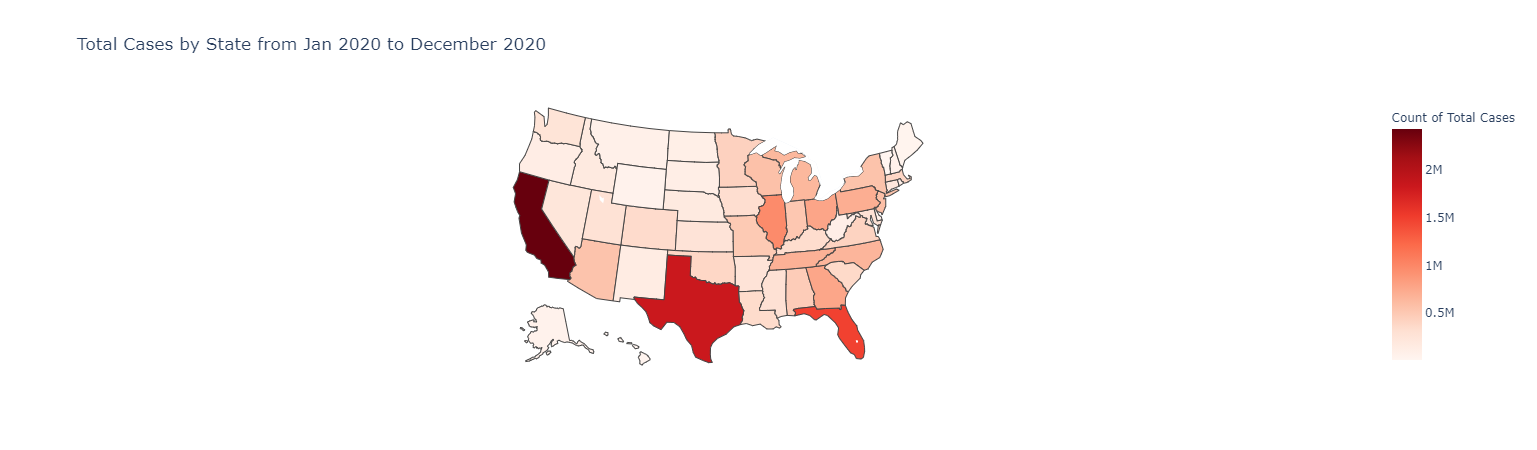

In [66]:
#Using Choropleth which is part of the Plotly library to create a spacial visualization
fig = go.Figure(data=go.Choropleth(
    locations=total_daily_new_cases_df_one_year_by_state['state'], # Spatial coordinates
    z = total_daily_new_cases_df_one_year_by_state['tot_daily_cases'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Count of Total Cases",
))

# Updating title and limit scope to US
fig.update_layout(
    title_text = 'Total Cases by State from Jan 2020 to December 2020',
    geo_scope='usa',
)

In [74]:
#Select one year of GDP data
one_year_gdp_df = quarterly_gdp_df.loc['2019-12-31':'2020-12-31']
one_year_gdp_df = one_year_gdp_df.sum(axis=0, skipna=True)

#Pass data into dataframe
one_year_gdp_df = pd.DataFrame(one_year_gdp_df)
one_year_gdp_df.columns=["Sum of 2020 GDP"]
one_year_gdp_df.index.names = ['state']
one_year_gdp_df = one_year_gdp_df.reset_index()
#one_year_gdp_df

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

one_year_gdp_df['states'] = states
one_year_gdp_df


,state,Sum of 2020 GDP,states
0,Alabama,983974.1,AL
1,Alaska,256022.4,AK
2,Arizona,1611640.6,AZ
3,Arkansas,575726.7,AR
4,California,13739621.5,CA
5,Colorado,1765638.4,CO
6,Connecticut,1216426.7,CT
7,Delaware,311837.9,DE
8,District of Columbia,613395.0,DC
9,Florida,4716205.2,FL


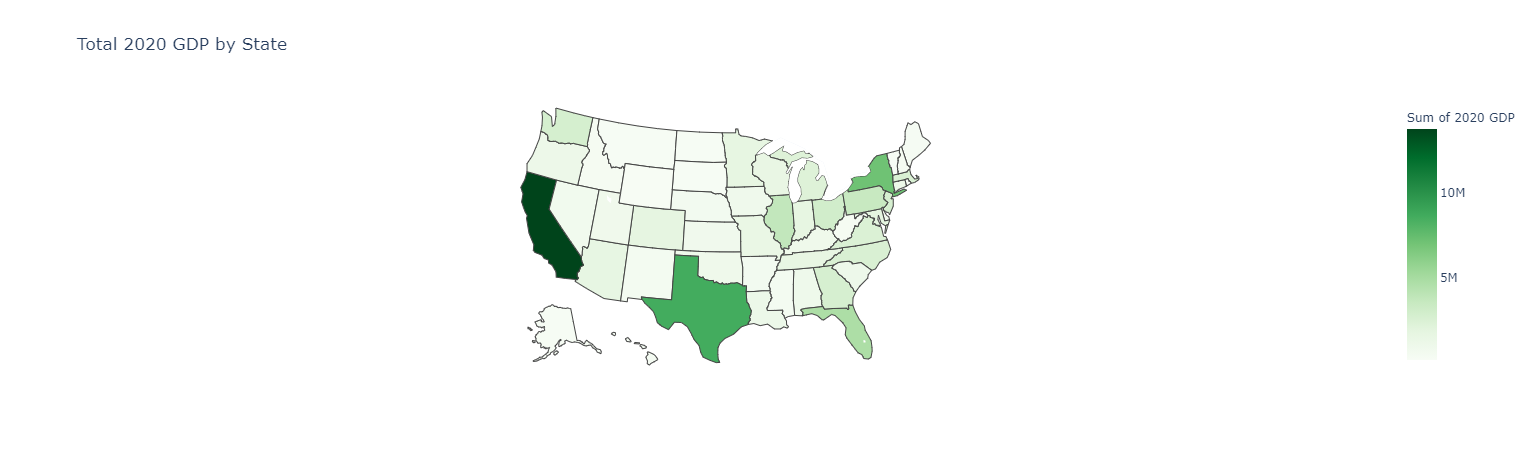

In [72]:
#Using Choropleth which is part of the Plotly library to create a spacial visualization
fig2 = go.Figure(data=go.Choropleth(
    locations=one_year_gdp_df["states"], # Spatial coordinates
    z = one_year_gdp_df["Sum of 2020 GDP"].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "Sum of 2020 GDP",
))

# Updating title and limit scope to US
fig2.update_layout(
    title_text = 'Total 2020 GDP by State',
    geo_scope='usa',
)

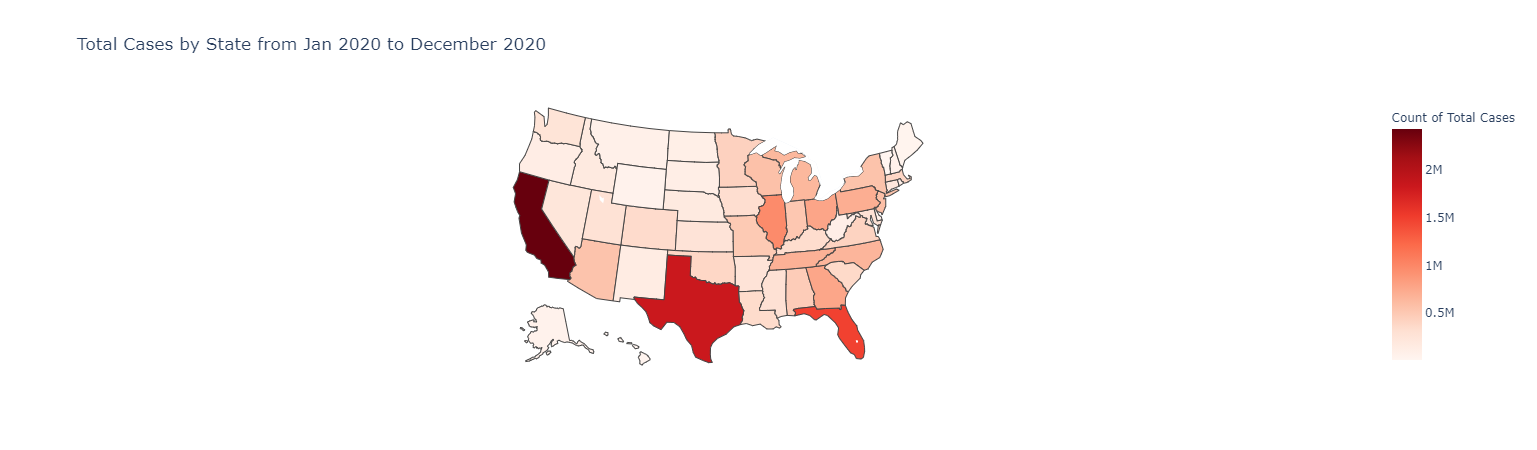

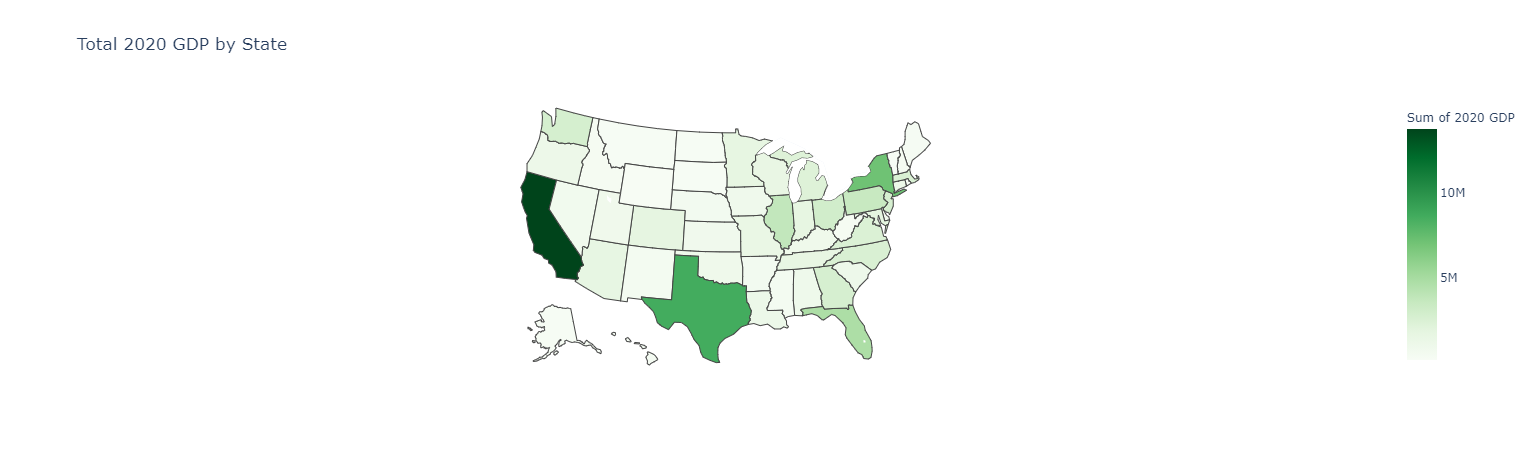

In [73]:
#Stack the visualizations on top of each other
display(fig) 
display(fig2)

Questions: Is there strong correlation between COVID cases and GDP? If so, how did COVID affect GDP?

What we can see from the visualization is that there was a slight decrease in GDP for many states around the time of the very first COVID spike that was around March and April of 2020.  However, the second COVID spike around July of 2020 was after the first big COVID lockdown, and that is where the biggest dip to state GDP occurred.

Interestingly GDP was already recovering and continued to recover even through the biggest COVID spike of all which was around the beginning of 2021.  This may indicate that less full COVID lockdowns occurred that the economy had adapted to more of the COVID restrictions.